1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
from scipy.stats import poisson, norm

hur_2005 = 15
average = 6.3
significance_level = 0.022

poisson_prob = 1 - poisson.cdf(hur_2005 - 1, average)
Z_score = norm.ppf(1 - poisson_prob)

print("Probability of observing 15 or more hurricanes:", poisson_prob)
print("Z Score:", Z_score)
print(" Is the 2005 number of hurricanes signficantly larger than the other years?", Z_score >= 2)


Probability of observing 15 or more hurricanes: 0.002217122790073134
Z Score: 2.8454949985159472
 Is the 2005 number of hurricanes signficantly larger than the other years? True


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T Statistic = -5.355623844793182


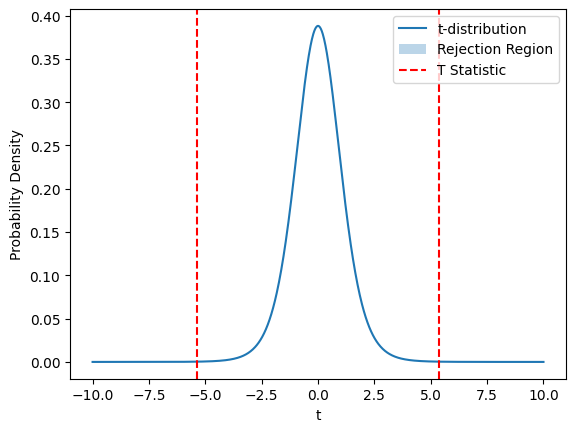

Two-sided p-value = 0.00045894515934552516


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))
combined_sigma = np.sqrt(((sigma_pre ** 2) + (sigma_post ** 2)) / 2)

sample_mean_pre = np.mean(pre)
sample_mean_post = np.mean(post)
n_samples = len(pre)
T_statistic = (sample_mean_pre - sample_mean_post) / (combined_sigma / np.sqrt(n_samples))
print("T Statistic =", T_statistic)

xs = np.linspace(-10, +10, 1000)
t_distribution = stats.t.pdf(xs, n_samples - 1)
plt.plot(xs, t_distribution, label="t-distribution")
plt.fill_between(xs, t_distribution, where=(np.abs(xs) > np.abs(T_statistic)), alpha=0.3, label="Rejection Region")
plt.axvline(T_statistic, linestyle='--', color='red', label="T Statistic")
plt.axvline(-T_statistic, linestyle='--', color='red')
plt.ylabel("Probability Density")
plt.xlabel("t")
plt.legend()
plt.show()

p_value = 2 * (1. - stats.t.cdf(np.abs(T_statistic), n_samples - 1))
print("Two-sided p-value =", p_value)


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

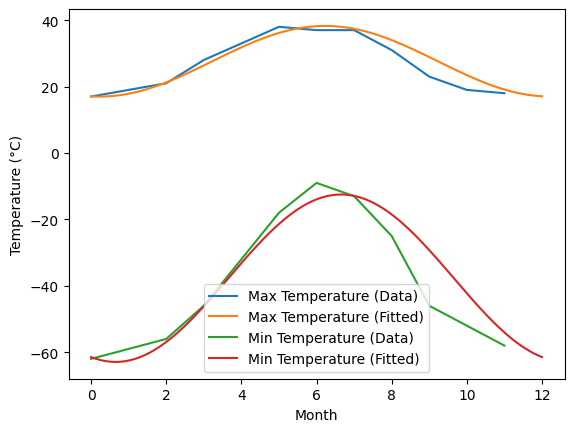

The fit is reasonable, because data and fitted curves are almost the same for both, max and min temparature. Also the time offset difference between min and max temperatures close to zero, indicating that the peaks and troughs align well in time


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

tempMax = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
tempMin = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.arange(12)
res_max, cov_max = optimize.curve_fit(lambda times, avg, ampl, offset: avg + ampl * np.cos((times + offset) * 2 * np.pi / times.max()), months, tempMax, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(lambda times, avg, ampl, offset: avg + ampl * np.cos((times + offset) * 2 * np.pi / times.max()), months, tempMin, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, tempMax, label='Max Temperature (Data)')
plt.plot(days, res_max[0] + res_max[1] * np.cos((days + res_max[2]) * 2 * np.pi / days.max()), label='Max Temperature (Fitted)')
plt.plot(months, tempMin, label='Min Temperature (Data)')
plt.plot(days, res_min[0] + res_min[1] * np.cos((days + res_min[2]) * 2 * np.pi / days.max()), label='Min Temperature (Fitted)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

print("The fit is reasonable, because data and fitted curves are almost the same for both, max and min temparature. Also the time offset difference between min and max temperatures close to zero, indicating that the peaks and troughs align well in time")

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

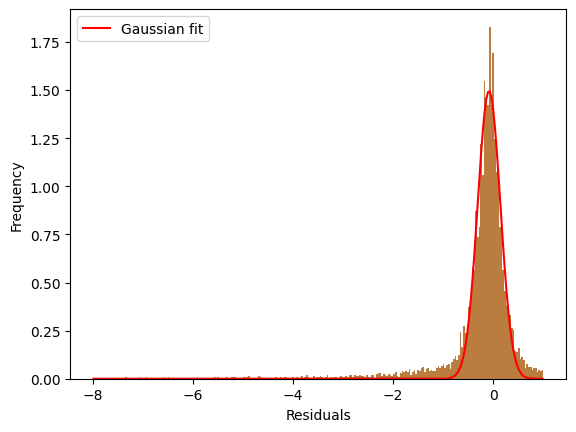

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

data = np.load("residuals_261.pkl", allow_pickle=True).item()
residuals = pd.DataFrame(data, columns=['residuals'])

n, bins, _ = plt.hist(residuals['residuals'], bins='auto', align='mid', range=(-8, 1), density=True)

bin_centers = 0.5 * (bins[1:] + bins[:-1])
bin_widths = bins[1] - bins[0]

def gaussian(x, A, mean, sigma):
    return A * np.exp(-(x - mean) ** 2 / (2 * sigma ** 2))


params, covariance = curve_fit(gaussian, bin_centers, n, p0=[1, np.mean(residuals['residuals']), np.std(residuals['residuals'])])

plt.hist(residuals['residuals'], bins='auto', align='mid', range=(-8, 1), density=True, alpha=0.7)
plt.plot(bin_centers, gaussian(bin_centers, *params), 'r-', label='Gaussian fit')

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

B parameter represents the phase shift of the cosine function. It may represent the time of year when temperatures are at their peak. A positive value means a phase shift towards the future, and a negative value means a shift towards the past.
Best-fit values and uncertainties for the cosine function:
a = -9.67 +/- 0.18
c = 12.34 +/- 0.02
d = 9.05 +/- 0.12

Overall average temperature in Munich: 8.94
Predicted temperature for the coldest time of year: -0.41
Predicted temperature for the hottest time of year: 9.00


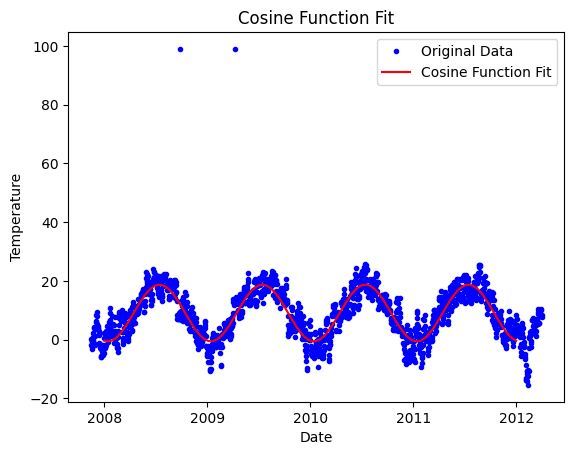

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

date, temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)

def cosine_function(t, a, c, d):
    return a * np.cos(2 * np.pi * t + c) + d

popt_cosine, pcov_cosine = curve_fit(cosine_function, date, temperature)

a_cosine, c_cosine, d_cosine = popt_cosine
a_err_cosine, c_err_cosine, d_err_cosine = np.sqrt(np.diag(pcov_cosine))

average_temperature = np.mean(temperature)

coldest_prediction = cosine_function(np.min(date), a_cosine, c_cosine, d_cosine)
hottest_prediction = cosine_function(np.max(date), a_cosine, c_cosine, d_cosine)

print("B parameter represents the phase shift of the cosine function. It may represent the time of year when temperatures are at their peak. A positive value means a phase shift towards the future, and a negative value means a shift towards the past.")

print("Best-fit values and uncertainties for the cosine function:")
print(f"a = {a_cosine:.2f} +/- {a_err_cosine:.2f}")
print(f"c = {c_cosine:.2f} +/- {c_err_cosine:.2f}")
print(f"d = {d_cosine:.2f} +/- {d_err_cosine:.2f}\n")

print(f"Overall average temperature in Munich: {average_temperature:.2f}")
print(f"Predicted temperature for the coldest time of year: {coldest_prediction:.2f}")
print(f"Predicted temperature for the hottest time of year: {hottest_prediction:.2f}")

plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.', color='blue', label='Original Data')
xfine_cosine = np.linspace(2008, 2012, 100)
plt.plot(xfine_cosine, cosine_function(xfine_cosine, *popt_cosine), color='red', label='Cosine Function Fit')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Cosine Function Fit')
plt.legend()
plt.show()
